# Ensemble Learning 
## Exercise: for Pima Indians Diabetes Dataset, perform hyperparameter tuning with Ensemble Models and final evaluation in AUC-ROC
- It is an advanced machine learning technique where multiple machines/models/algorithms are combined to improve the accuracy and robustness of the prediction
- 2 Types of Ensemble Learning Model
    - Bagging 
    - Boosting

![ens](https://www.appliedaicourse.com/blog/wp-content/uploads/2024/10/difference-between-bagging-and-boosting-1024x576.webp)

### About AUC-ROC Curve
- AUC: Area Under the Curve
- ROC: Receiver Operating Characteristic
- AUC-ROC Curve is a widely used evaluation method, mainly for binary classification that plotes a graph that neasures how well a machine learning model can classify positive results
- Its also useful for comparing the performance across multiple models
- How it works:
    - The ROC curve plots the True Positive Rate(TPR) versus the False Positive Rate(FPR)
    - AUC is the area under the curve of the model output

![auc](https://miro.medium.com/v2/resize:fit:1200/1*Bgc9QOjhnL70g2SQxyj6hQ.png)

- Its like having 3 different models (orange, green, blue), the closer the model is to the Upper Left - the more better (High True Positive & Low False Positive)
- If the our model's curve falls under dotted line (Random Classifier) then your model is NOT better than 50% prediction (True Positive & False Positive both are 0.5)  

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [3]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

col_names = ['preg', 'plas', 'pres', 'skin', 'mass', 'pedi', 'age', 'diabetes']

df = pd.read_csv(url, names=col_names)
df.head()

,preg,plas,pres,skin,mass,pedi,age,diabetes
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop(columns='diabetes', axis=1)
y = df['diabetes']

>we skip test_train_split cuz the dataset is small

> NOTE: you can perform hyperparameter tuning using 'GridSearchCV' on the models below:

In [6]:
models = {
    # Bagging Model - parallel
    'RandomForest': RandomForestClassifier(n_estimators=100), #the number of machine learning algorithms working in parallel

    # Boosting Model - sequential
    'AdaBoostClassifier': AdaBoostClassifier(n_estimators=100),
    'GradientBoostingClassifier':GradientBoostingClassifier(n_estimators=100) 
}

Random Forest Classifier --> bunch of decision trees and these all are working in parallel

In [10]:
cv_method = StratifiedKFold(n_splits=6, shuffle=True, random_state=12)

we now build a loop that goes via every model and does the prediction and then gives us the cross validation output of them

In [17]:
for name, model in models.items():          #models.items() --> gives all items in 'models'
    #train and calculate the cross validation and prediction with probability
    y_pred_proba = cross_val_predict(model, X, y, cv=cv_method, method='predict_proba')[:,1]

    #calculate the auc score and curve 
    auc = roc_auc_score(y, y_pred_proba)
    print(f'{name}: AUC-ROC Score = {auc:.4f}')

RandomForest: AUC-ROC Score = 0.8147
AdaBoostClassifier: AUC-ROC Score = 0.8199
GradientBoostingClassifier: AUC-ROC Score = 0.8296


>Highest Number one is the best model

RandomForest: AUC-ROC Score = 0.8218
AdaBoostClassifier: AUC-ROC Score = 0.8199
GradientBoostingClassifier: AUC-ROC Score = 0.8289


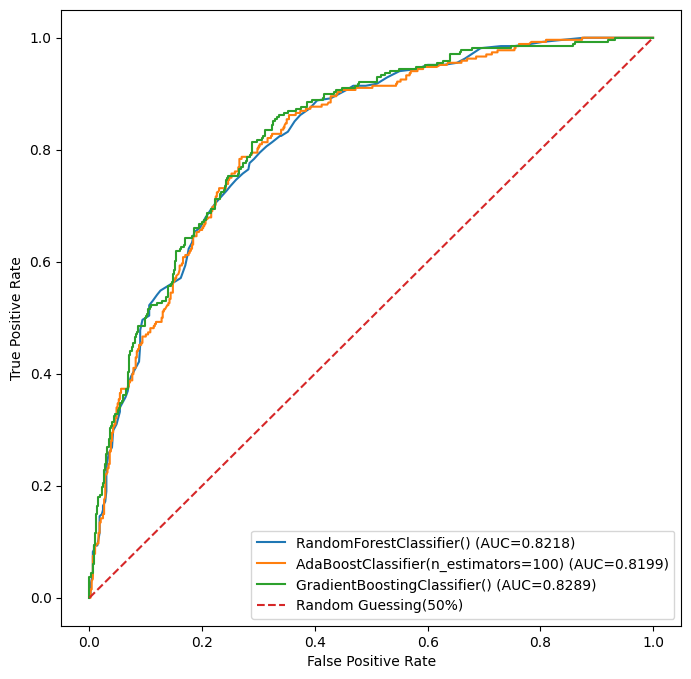

In [24]:
plt.figure(figsize=(8,8))

for name, model in models.items():          #models.items() --> gives all items in 'models'
    #train and calculate the cross validation and prediction with probability
    y_pred_proba = cross_val_predict(model, X, y, cv=cv_method, method='predict_proba')[:,1]

    #calculate the auc score and curve 
    auc = roc_auc_score(y, y_pred_proba)
    print(f'{name}: AUC-ROC Score = {auc:.4f}')

    fpr, tpr, threshold = roc_curve(y, y_pred_proba)

    #plot
    plt.plot(fpr, tpr, label=f'{model} (AUC={auc:.4f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#dotted line (Random Classifier):
plt.plot([0,1], [0,1], linestyle='--', label='Random Guessing(50%)')
plt.legend()

If a Advance ML model is close to performance of a Simpler ML model then we should choose the simpler model as it will consume less resources as compared to the advance model which will require more power 